# Ciência dos Dados - Projeto 1


** Nome:** Gabriel Miras Floriano

**Pergunta:** Como uma elevada população urbana e um setor de serviços desenvolvido ﻿interferem no IDH?﻿

# IDH, População Urbana e Setor de Serviços
Foram coletados três dados do site https://www.gapminder.org/, sendo que um deles foi definido pelo professor e os outros dois foram de livre escolha dos alunos:

1. IDH (Índice de Desenvolvimento Humano)
2. População Urbana (% do total)
3. Setor de Serviços (% do PIB)

Nesses dataframes, as linhas representam os países e as colunas representam o ano.

Como os arquivos estão separados, será preciso juntá-los cruzando o país, restringindo a análise do ano 2009.

# Leitura dos arquivos e mudanças de índices

In [50]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [51]:
#Leitura dos arquivos em excel
hdi = pd.read_excel('Indicator_HDI.xlsx')
UP = pd.read_excel('UP.xlsx')
S = pd.read_excel('S.xlsx')

# IDH

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [52]:
hdi= hdi.loc[:, ["HDI", 2009]]
hdi = hdi.rename(columns = {'HDI':'País', 2009:'IDH em 2009'})
hdi.head(10)

,País,IDH em 2009
0,Abkhazia,NaN
1,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN
3,Albania,0.734
4,Algeria,0.691
5,American Samoa,NaN
6,Andorra,NaN
7,Angola,0.481
8,Anguilla,NaN
9,Antigua and Barbuda,NaN


# População Urbana

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [53]:
UP= UP.loc[:, ["Urban population (% of total)", '2009']]
UP = UP.rename(columns = {"Urban population (% of total)":'País', '2009':'População Urbana em 2009'})
UP.head(10)

,País,População Urbana em 2009
0,Abkhazia,NaN
1,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN
3,Albania,51.2184
4,Algeria,70.9570
5,American Samoa,92.6390
6,Andorra,88.3126
7,Angola,57.4918
8,Anguilla,NaN
9,Antigua and Barbuda,30.0322


# Setor de Serviços

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [54]:
S= S.loc[:, ["Services, etc., value added (% of GDP)", '2009']]
S = S.rename(columns = {'Services, etc., value added (% of GDP)':'País', '2009':'Setor de Serviços em 2009'})
S.head(10)

,País,Setor de Serviços em 2009
0,Afghanistan,47.607657
1,Albania,60.239255
2,Algeria,30.960967
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,30.751248
6,Antigua and Barbuda,76.285758
7,Argentina,60.697484
8,Armenia,45.280450
9,Aruba,NaN


# Junção das tabelas

In [55]:
df = hdi.join(UP, how='inner', lsuffix='hdi', rsuffix='2009')
df.head(21)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009
0,Abkhazia,NaN,Abkhazia,NaN
1,Afghanistan,0.387,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN
3,Albania,0.734,Albania,51.2184
4,Algeria,0.691,Algeria,70.9570
5,American Samoa,NaN,American Samoa,92.6390
6,Andorra,NaN,Andorra,88.3126
7,Angola,0.481,Angola,57.4918
8,Anguilla,NaN,Anguilla,NaN
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322


In [56]:
data = df.join(S, how="inner", lsuffix = ' ', rsuffix = ' ')
data.head(21)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009,País,Setor de Serviços em 2009
0,Abkhazia,NaN,Abkhazia,NaN,Afghanistan,47.607657
1,Afghanistan,0.387,Afghanistan,22.9676,Albania,60.239255
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN,Algeria,30.960967
3,Albania,0.734,Albania,51.2184,American Samoa,NaN
4,Algeria,0.691,Algeria,70.9570,Andorra,NaN
5,American Samoa,NaN,American Samoa,92.6390,Angola,30.751248
6,Andorra,NaN,Andorra,88.3126,Antigua and Barbuda,76.285758
7,Angola,0.481,Angola,57.4918,Argentina,60.697484
8,Anguilla,NaN,Anguilla,NaN,Armenia,45.280450
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322,Aruba,NaN


In [57]:
writer = pd.ExcelWriter('Projeto1.xlsx')
data.to_excel(writer,'data')
writer.save()

# Gráficos

In [58]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

A correlação entre o IDH em 2009 e a população urbana em 2009 é: 0.7636087451596548


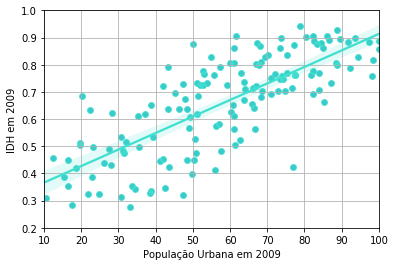

In [72]:
data.plot.scatter(x='População Urbana em 2009',y='IDH em 2009');
sns.regplot(data["População Urbana em 2009"],data["IDH em 2009"], color=('turquoise'))
plt.axis([10, 100, 0.2, 1])
plt.grid()
print('A correlação entre o IDH em 2009 e a população urbana em 2009 é:', data['IDH em 2009'].corr(data['População Urbana em 2009']))

A correlação entre o IDH em 2009 e o setor de serviços em 2009 é: 0.021909223026682162


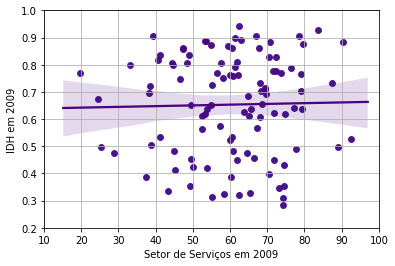

In [75]:
data.plot.scatter(x='Setor de Serviços em 2009',y='IDH em 2009');
sns.regplot(data["Setor de Serviços em 2009"],data["IDH em 2009"], color=('indigo'))
plt.axis([10, 100, 0.2, 1])
plt.grid()
print('A correlação entre o IDH em 2009 e o setor de serviços em 2009 é:', data['IDH em 2009'].corr(data['Setor de Serviços em 2009']))

A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é: 0.009760147212070417


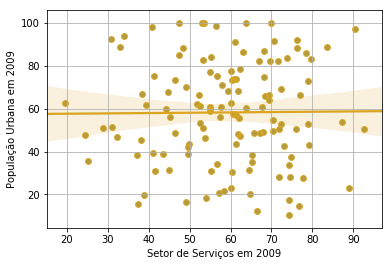

In [79]:
data.plot.scatter(x='Setor de Serviços em 2009',y='População Urbana em 2009');
sns.regplot(data["Setor de Serviços em 2009"],data["População Urbana em 2009"], color=('goldenrod'))
plt.grid()
print('A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é:', data['Setor de Serviços em 2009'].corr(data['População Urbana em 2009']))

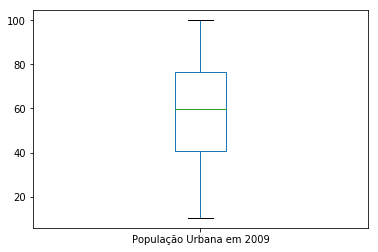

In [62]:
data.loc[:, 'População Urbana em 2009'].plot.box()

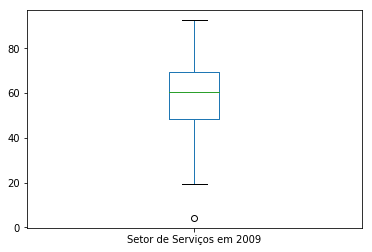

In [63]:
data.loc[:, 'Setor de Serviços em 2009'].plot.box()

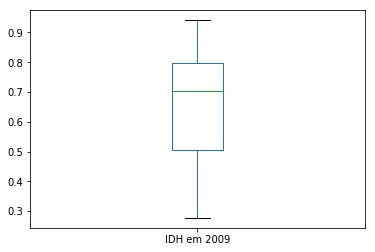

In [64]:
data.loc[:, 'IDH em 2009'].plot.box()